Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, mu]
100%|█████████████████████████████████████████████████████████████████████████████| 1600/1600 [00:02<00:00, 700.23it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B66AABCF8>,
      dtype=object)

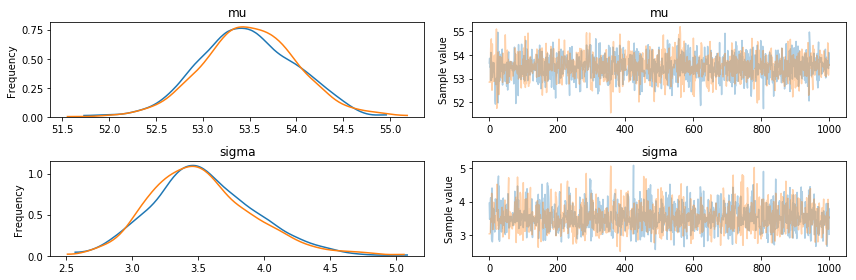

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
from scipy import stats
import seaborn as sns
 
data = np.array([51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 
                 48.45, 52.34, 55.65, 51.49, 51.86, 63.43, 
                 53.00, 56.09, 51.93, 52.31, 52.33, 57.48,  
                 57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 
                 51.36, 55.47, 50.73, 51.94, 54.95, 50.39,
                 52.91, 51.5 , 52.68, 47.72, 49.73, 51.82, 
                 54.99, 52.84, 53.19, 54.52, 51.46, 53.73, 
                 51.61, 49.81, 52.42, 54.3 , 53.84, 53.16])

#模型设置
with pm.Model() as model_g:
    mu = pm.Uniform('mu', 40, 75)
    sigma = pm.HalfNormal('sigma', sd=10)
    y = pm.Normal('y', mu=mu, sd=sigma, observed=data)
    #对后验进行采样
    trace_g = pm.sample(1100,cores=1)

chain_g = trace_g[100:]
pm.traceplot(chain_g)


C:\Users\Forry\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.
100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 745.31it/s]
C:\Users\Forry\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


ValueError: too many values to unpack (expected 2)

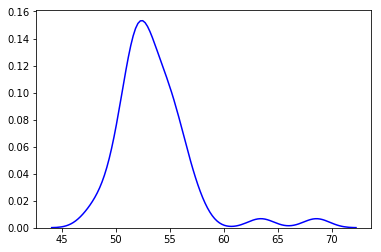

In [6]:
y_pred = pm.sample_ppc(chain_g, 100, model_g, size=len(data))
sns.kdeplot(data, c='b')
for i in y_pred['y']:
    sns.kdeplot(i, c='r', alpha=0.1)
plt.xlim(35, 75)
plt.title('Gaussian model', fontsize=18)
plt.xlabel('$x$', fontsize=18)


In [29]:
#test：v<2时，采样值不稳定
np.mean(stats.t(loc=0, scale=1, df=1).rvs(100))

0.4741093853143444

In [ ]:
x_values = np.linspace(-10, 10, 200)
for df in [1, 2, 5, 30]:
    distri = stats.t(df)
    x_pdf = distri.pdf(x_values)
    plt.plot(x_values, x_pdf, label=r'$\nu$ = {}'.format(df))
    
x_pdf = stats.norm.pdf(x_values)
plt.plot(x_values, x_pdf, label=r'$\nu = \infty$')
plt.xlabel('x')
plt.ylabel('p(x)', rotation=0)
plt.legend(loc=0, fontsize=18)
plt.xlim(-7, 7)#the range of x axis

In [ ]:
'''t分布模型'''
with pm.Model() as model_t:
    mu = pm.Uniform('mu', 40, 75)
    sigma = pm.HalfNormal('sigma', sd=10)
    nu = pm.Exponential('nu', 1/30)#新增一个较弱的先验作为t分布的参数
    y = pm.StudentT('y', mu=mu, sd=sigma, nu=nu, observed=data)
    trace_t = pm.sample(100,cores=1)

chain_t = trace_t[100:]
pm.traceplot(chain_t)

In [5]:
y_pred = pm.sample_ppc(chain_t, 100, model_t, size=len(data))
sns.kdeplot(data, c='b')
for i in y_pred['y']:
    sns.kdeplot(i, c='r', alpha=0.1)
plt.xlim(35, 75)
plt.title("Student's model", fontsize=18)
plt.xlabel('$x$', fontsize=18)

NameError: name 'chain_t' is not defined